###Generall Analysis of all tweets
**Each data set here analized is collected from Twitter REST API searched for hashtags used in the days near manifestations against Dilma's government that happened in Brazil during August 16th, 2015**
- Graphs bellow show the amount of tweets for each hashtag, which are:
 - \#dilma
 - @dilma
 - pretrolao
 - foraPT
 - foraDilma
 - corrupcao
 - vemprarua
 
 


In [56]:
import io
import json
import matplotlib.pyplot as plt
import datetime
from collections import Counter
import matplotlib.pyplot as plt
import glob, os
from datetime import datetime
import matplotlib.dates as mdates
import codecs

In [2]:
# Tweets by month.
%pylab inline
from datetime import datetime

def parse_date(datestring):
    """ Input, e.g., Mon Aug 24 19:41:14 +0000 2015
    Output, e.g., 24 """
    #Sat May 16 16:30:12 +0000 2015
    #print datestring
    parts = datestring.split()
    var = datetime.strptime(parts[1]+' ' +parts[2]+' '+ parts[5],'%b %d %Y')
    return var

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
def tweets_by_month(tweets):
    #parsing date for all_tweets, positive and negative

    months = Counter(parse_date(x['created_at']) for x in tweets if parse_date(x['created_at']) > '15')#all
    months = sorted(months.items())
 
    values = [r[1] for r in months]
    keys = [r[0] for r in months]
    print 'All tweets', values, '.Total: ',sum(values)

    line, = plt.plot(keys, values,'bo-', label="Line ")#, linestyle='dotted')
    plt.xlabel('Days')
    plt.ylabel('# tweets')
    plt.title('Frequency of tweets')
    plt.legend([line], ["All tweets"], loc=0)



**Tweets vem pra rua - Come to the street**

All tweets [27509, 2894, 388, 394, 385, 210, 177, 252, 123] .Total:  32332


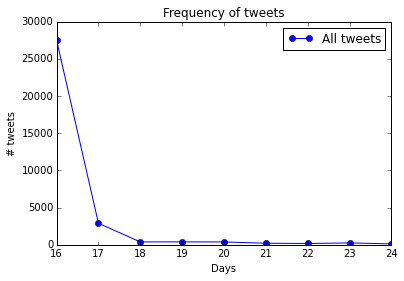

In [11]:
DIR = 'D:/TCC/Data/REST API/'
data = []

with io.open(DIR+'tweets_vemprarua.txt','r',encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))
        
tweets_by_month(data)

** Tweets #dilma**

All tweets [2485, 1174, 683, 679, 664, 490, 769, 463, 426] .Total:  7833


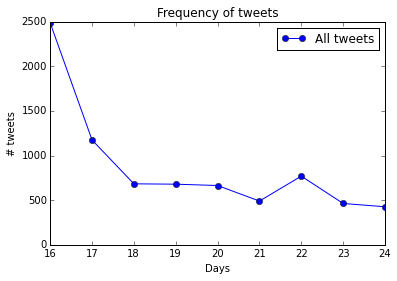

In [12]:
data_hashdilma = []
with io.open(DIR+'tweets#dilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_hashdilma.append(json.loads(line))
        
tweets_by_month(data_hashdilma)

** Tweets @dilma**

All tweets [42, 209, 128, 25, 66, 57, 30, 22, 27] .Total:  606


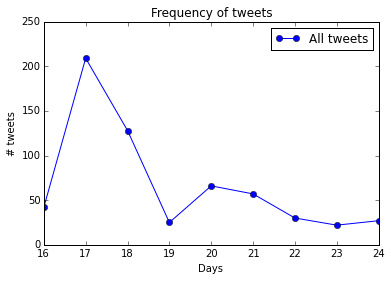

In [13]:
data_dilma_mentions = []
with io.open(DIR+'tweets@dilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_dilma_mentions.append(json.loads(line))
        
tweets_by_month(data_dilma_mentions)

**Tweets mentioning "corrupção" (corruption)**

All tweets [29697, 17450, 10017, 14962, 16766, 11616, 7120, 5959, 4280] .Total:  117867


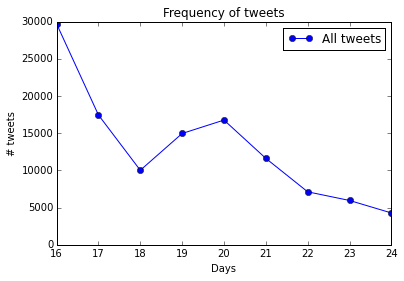

In [14]:
data_corrup = []
with io.open(DIR+'tweets_corrupcao.txt','r',encoding="utf-8") as f:
    for line in f:
        data_corrup.append(json.loads(line))
        
tweets_by_month(data_corrup)

**Tweets mentioning fora Dilma (Dilma out)**

All tweets [10569, 16599, 5038, 2791, 5489, 4664, 4038, 4484, 2403] .Total:  56075


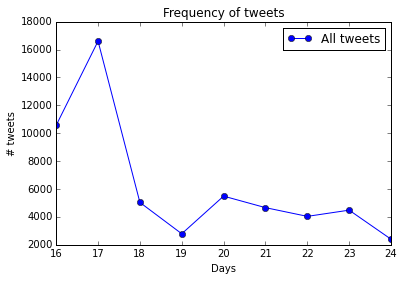

In [15]:
data_foraDilma = []
with io.open(DIR+'tweets_foraDilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_foraDilma.append(json.loads(line))
        
tweets_by_month(data_foraDilma)

** Tweets mentioning "petrolão"**

All tweets [1264, 584, 551, 615, 1132, 1081, 1607, 703, 448] .Total:  7985


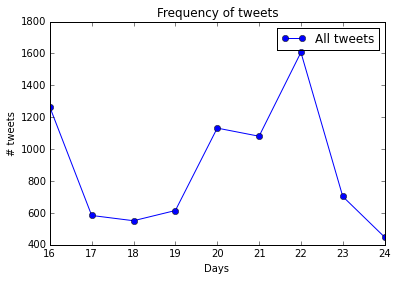

In [18]:
data_tweets_petrolao = []
with io.open(DIR+'tweets_petrolao.txt','r',encoding="utf-8") as f:
    for line in f:
        data_tweets_petrolao.append(json.loads(line))

tweets_by_month(data_tweets_petrolao)

** Tweets mentioning fora PT (PT out)** 
PT is Dilma's party 

All tweets [2193, 3516, 1891] .Total:  7600


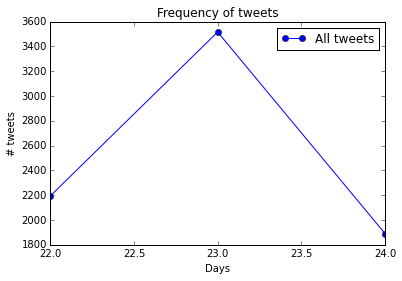

In [20]:
data_tweets_foraPT = []
with io.open(DIR+'tweets_foraPT.txt','r',encoding="utf-8") as f:
    for line in f:
        data_tweets_foraPT.append(json.loads(line))
        
tweets_by_month(data_tweets_foraPT)

##Timeline Analysis

Here we compute the first day on which users used one of the keywords (foraDilma(Dilma out), foraPT(PT out) and vemprarua(come to the street)) and plot a barchart with the distribution of activation (**"number of users" X "day of activation"**).

In [123]:
#DIR = "D:/TCC/Data/Timeline/vemprarua/"
DIR = 'C:/Users/Elaine/Documents/Data/Timeline/vemprarua/'

In [125]:
os.chdir(DIR)
date_ative = []
countuser = 0
user = []
#if 'foraDILMA' in tweet['text'] or 'foradilma' in tweet['text'] or 'Fora Dilma' in tweet['text'] or 'foraDilma' in tweet['text'] or 'FORADILMA' in tweet['text'] or 'fora Dilma' in tweet['text'] or 'FORA DILMA' in tweet['text'] or 'ForaDilma' in tweet['text']:
#if 'foraPT' in tweet['text'] or 'FORAPT' in tweet['text'] or 'fora pt' in tweet['text']or 'FORA PT' in tweet['text'] or 'ForaPT' in tweet['text']:
#if 'vempraRua' in tweet['text'] or 'vemprarua' in tweet['text'] or 'vem pra rua' in tweet['text']or 'VEMPRARUA' in tweet['text'] or 'VemPraRua' in tweet['text']:

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    with io.open(DIR+file,'r',encoding="utf-8") as f:
        for line in  f.readlines():
            tweet= json.loads(line)
            
            if 'vempraRua' in tweet['text'] or 'vemprarua' in tweet['text'] or 'vem pra rua' in tweet['text']or 'VEMPRARUA' in tweet['text'] or 'VemPraRua' in tweet['text']:
                date_ative.append(tweet['created_at'])
                user.append(tweet['user']['screen_name'])
                break
            #else:
             #   print tweet['user']['screen_name']
        if tweet['user']['screen_name'] not in set(user):
            print tweet['user']['screen_name']
                
        countuser+=1
        
           
    #data_tweets_foraPT.append(json.loads(line))

In [126]:
print "From", countuser," total users,", len(date_ative), "posted the keyword."
print date_ative[1]

From 118  total users, 118 posted the keyword.
Wed Jul 29 20:51:44 +0000 2015


In [131]:
from datetime import datetime

aa = sorted(Counter(parse_date(f)for f in date_ative if (f.split()[5]=='2015') and (f.split()[1]=='Jul'or f.split()[1]=='Aug' or f.split()[1]=='Sep')).items())
print aa

values = [r[1] for r in aa]
print values, '\n'

keys = [r[0] for r in aa]
print keys

[(datetime.datetime(2015, 7, 1, 0, 0), 1), (datetime.datetime(2015, 7, 9, 0, 0), 1), (datetime.datetime(2015, 7, 10, 0, 0), 1), (datetime.datetime(2015, 7, 11, 0, 0), 2), (datetime.datetime(2015, 7, 18, 0, 0), 1), (datetime.datetime(2015, 7, 22, 0, 0), 1), (datetime.datetime(2015, 7, 23, 0, 0), 2), (datetime.datetime(2015, 7, 24, 0, 0), 1), (datetime.datetime(2015, 7, 25, 0, 0), 2), (datetime.datetime(2015, 7, 29, 0, 0), 1), (datetime.datetime(2015, 7, 30, 0, 0), 1), (datetime.datetime(2015, 7, 31, 0, 0), 2), (datetime.datetime(2015, 8, 3, 0, 0), 2), (datetime.datetime(2015, 8, 5, 0, 0), 1), (datetime.datetime(2015, 8, 6, 0, 0), 2), (datetime.datetime(2015, 8, 7, 0, 0), 3), (datetime.datetime(2015, 8, 8, 0, 0), 1), (datetime.datetime(2015, 8, 10, 0, 0), 1), (datetime.datetime(2015, 8, 11, 0, 0), 4), (datetime.datetime(2015, 8, 12, 0, 0), 3), (datetime.datetime(2015, 8, 13, 0, 0), 1), (datetime.datetime(2015, 8, 14, 0, 0), 2), (datetime.datetime(2015, 8, 15, 0, 0), 2), (datetime.datetim

Populating the interactive namespace from numpy and matplotlib
[1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 4, 3, 1, 2, 2, 22, 4, 1, 1, 1, 2]
69


`%matplotlib` prevents importing * from pylab and numpy


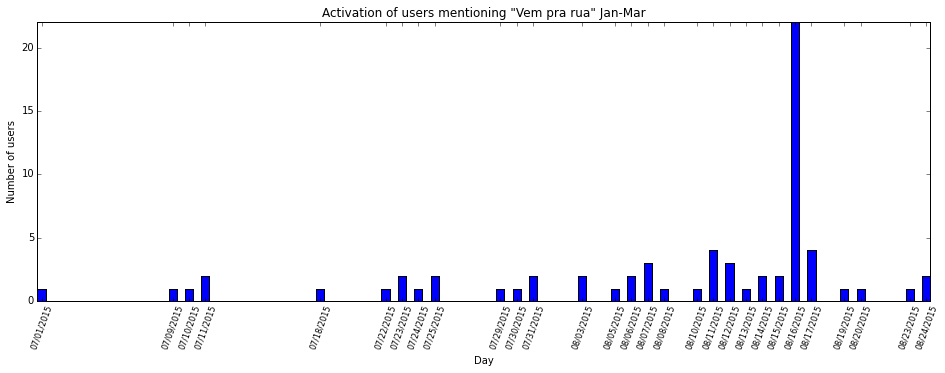

In [132]:
%pylab inline

counts = values
vals = keys
#print vals,'\n'
print counts
print sum(counts)

#ax = plt.subplot(111)
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)
ax.xaxis_date()
ax.autoscale(tight=True)
myFmt = mdates.DateFormatter('%m/%d/%Y')
ax.xaxis.set_major_formatter(myFmt)
plt.bar(vals, counts, align='center',width=0.5)
plt.xticks(vals)
plt.xticks(rotation=70)
plt.tick_params(axis='x', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)

plt.xlabel('Day')
plt.ylabel('Number of users')
plt.title("Activation of users mentioning \"Vem pra rua\" Jan-Mar")
plt.show()

In [135]:
user=[]
all_=[]
DIR = "D:/TCC/Data/Timeline/vemprarua/"
os.chdir(DIR)

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    user.append(file)
    all_.append(file)
print len(set(user)), 'users vem pra rua'
    
    
users=[]
DIR = "D:/TCC/Data/Timeline/foraDilma/"
os.chdir(DIR)

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    users.append(file)
    all_.append(file)
print len(set(users)), 'users fora Dilma'

user1=[]
DIR = "D:/TCC/Data/Timeline/foraPT/"
os.chdir(DIR)

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    user1.append(file)
    all_.append(file)
print len(set(user1)), 'users fora PT'
print len(set(all_))

117 users vem pra rua
204 users fora Dilma
102 users fora PT
321


In [136]:
DIR = 'C:/Users/Elaine/Desktop/TCC/Before election/foraDilma/'
os.chdir(DIR)
us=[]
all1_ = []

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    us.append(file)
    all1_.append(file)
    all_.append(file)
print len(set(us)), 'users fora Dilma'

DIR = 'C:/Users/Elaine/Desktop/TCC/Before election/foraPT/'
os.chdir(DIR)
use=[]

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    use.append(file)
    all1_.append(file)
    all_.append(file)
print len(set(use)), 'users fora PT'
print len(set(all1_))
print len(set(all_))

217 users fora Dilma
213 users fora PT
360
675


- 321 total users from Timeline
- 360 total users from Before election
- set of all = 675

In [121]:
#DIR = 'D:/TCC/Data/Timeline/foraPT/'
DIR= 'C:/Users/Elaine/Desktop/TCC/Before election/foraPT/'
os.chdir(DIR)

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    tweets = []
    with io.open(DIR+file,'r',encoding="utf-8") as f:
        for line in  reversed(f.readlines()):
            tweet= json.loads(line)
            tweets.append(tweet)

    for tt in tweets:
        tt['time_tweet'] = str(parse_date(tt['created_at']))
    
    sorted_tweets = sorted(tweets, key=lambda k: k['time_tweet'])


    with codecs.open("C:/Users/Elaine/Documents/Data/Before election/foraPT/"+file+'.txt', 'w+', encoding='utf-8') as fi:
       for f in sorted_tweets:
            fi.write(json.dumps(f,ensure_ascii=False,encoding='utf-8')+'\n')

In [282]:
DIR= 'C:/Users/Elaine/Documents/Data/Timeline/vemprarua/'
os.chdir(DIR)

#for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
positive_tweets = []
easy_negative_sample = []
hard_negative_sample = []
N=5

with io.open(DIR+'TatianaRCosta.txt.txt','r',encoding="utf-8") as f:
    lines = f.readlines()
    for i in xrange(len(lines)):
        tweet= json.loads(lines[i])
        if 'vempraRua' in tweet['text'] or 'vemprarua' in tweet['text'] or 'vem pra rua' in tweet['text']or 'VEMPRARUA' in tweet['text'] or 'VemPraRua' in tweet['text']:
            positive_tweets.append(tweet)
            date = timestring.Date(tweet['time_tweet'])
            i=i-1
            j=i-1
            tweet_date = date
            while  tweet_date >= date - '7 day': 
                tweet= json.loads(lines[i])                
                if timestring.Date(tweet['time_tweet']) < date - '7 day':
                    print 'Tweet created before 7 days: \n tweet date',timestring.Date(tweet['time_tweet']) ,'<', date - '7 day'
                    break
                else:
                    easy_negative_sample.append(tweet)
                    i=i-1
                    tweet_date = timestring.Date(tweet['time_tweet'])
                if i == 1:
                    print 'comeco do arquivo'
                    break
                    
            while len(hard_negative_sample)<N:
                tweet= json.loads(lines[j])    
                hard_negative_sample.append(tweet)
                j=-1
                
            break
    


Tweet created before 7 days: 
 tweet date 2015-08-08 00:00:00 < 2015-08-09 00:00:00


1 Sun Aug 16 19:19:25 +0000 2015 #vemprarua #forapt #londrinanaluta hellen_ukstin @ Praça Da Bandeira https://t.co/CI1yduR61x
7
2015-08-16 00:00:00
2015-08-16 00:00:00
2015-08-16 00:00:00
2015-08-14 00:00:00
2015-08-14 00:00:00
2015-08-11 00:00:00
2015-08-09 00:00:00
5


In [172]:
from datetime import datetime
import timestring

timestring.Date('2015-08-16 00:00:00')#, '%y-%m-%d %H:%M:%S')

<timestring.Date 2015-08-16 00:00:00 1101318968>

In [217]:
print date - '7 day', date

1706-02-28 00:00:00 1706-03-07 00:00:00


In [190]:
from datetime import date, timedelta

d = date.today() - timedelta(days=1)


In [191]:
d

datetime.date(2015, 9, 9)